In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import sklearn
from zipfile import ZipFile

In [58]:
train = pd.read_csv("training_set_VU_DM.csv")

In [59]:
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [13]:
train.isnull()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
1,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
2,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
3,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,False,False,True,False
4,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958343,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958344,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
4958345,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [60]:
df = pd.DataFrame(train)

In [64]:
df = train.loc[train['prop_id'] == 104517]

df = df.loc[df['visitor_location_country_id'] == 219]

df = df.loc[df['srch_room_count'] == 1]

df = df[['date_time', 'price_usd', 'prop_review_score', 'position']]
df.describe()


,price_usd,prop_review_score,position
count,1545.000000,1545.0,1545.000000
mean,113.890071,4.0,13.513269
std,149.901492,0.0,8.094166
min,37.000000,4.0,1.000000
25%,67.000000,4.0,8.000000
50%,100.000000,4.0,13.000000
75%,140.000000,4.0,18.000000
max,5584.000000,4.0,37.000000


In [65]:
df = df.loc[df['price_usd'] < 5584]
df['price_usd'].describe()

count    1544.000000
mean      110.347254
std        55.500456
min        37.000000
25%        67.000000
50%       100.000000
75%       140.000000
max       536.000000
Name: price_usd, dtype: float64

In [68]:
df['date_time'].describe()

df['date_time'] = pd.to_datetime(df['date_time'])

df.head()


<ipython-input-68-63c477b78611>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date_time'].describe()


,date_time,price_usd,prop_review_score,position
2041,2013-03-14 11:27:28,206.0,4.0,29
3152,2013-01-03 20:48:24,186.0,4.0,6
5166,2013-01-19 16:51:27,61.0,4.0,4
10135,2013-01-26 11:34:23,72.0,4.0,6
10560,2013-04-29 09:39:50,246.0,4.0,22


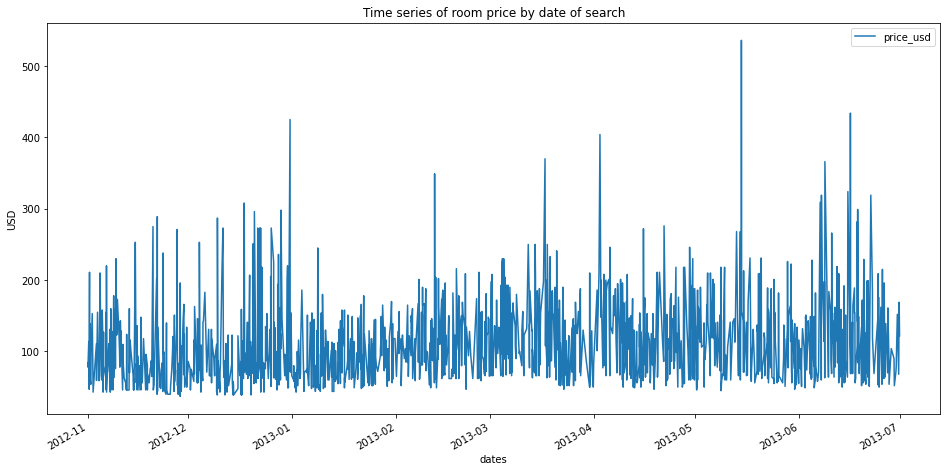

In [69]:
df.plot(x = 'date_time', 
        y = 'price_usd', 
        figsize = (16, 8))

plt.xlabel('dates')
plt.ylabel('USD')
plt.title('Time series of room price by date of search');

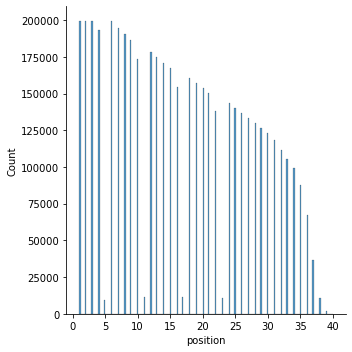

In [94]:
sns.displot(df.position)

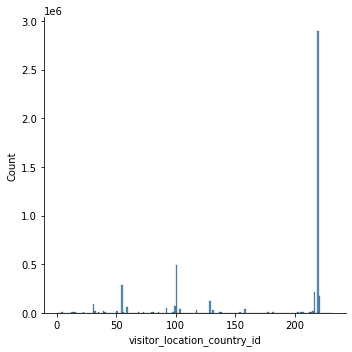

In [103]:
sns.displot(df.visitor_location_country_id)